<a href="https://colab.research.google.com/github/smitike/Stock-Price-Prediction-Using-LSTM/blob/main/(7.66%25)lstm_improved_model_diff_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [ ]:
import yfinance as yf
import pandas as pd

# Define start and end date
START = "2010-01-01"
TODAY = "2024-11-13"

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04 00:00:00+00:00,288.775726,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05 00:00:00+00:00,288.852448,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06 00:00:00+00:00,282.321259,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07 00:00:00+00:00,274.464600,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08 00:00:00+00:00,268.855408,349.899994,359.250000,348.250000,358.000000,6048178


# Define start day to fetch the dataset from the yahoo finance library

---



In [ ]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04 00:00:00+00:00,288.775726,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05 00:00:00+00:00,288.852448,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06 00:00:00+00:00,282.321259,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07 00:00:00+00:00,274.464600,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08 00:00:00+00:00,268.855408,349.899994,359.250000,348.250000,358.000000,6048178


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

<ipython-input-4-8097d146b7ad>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178


Visualizing Closing Price

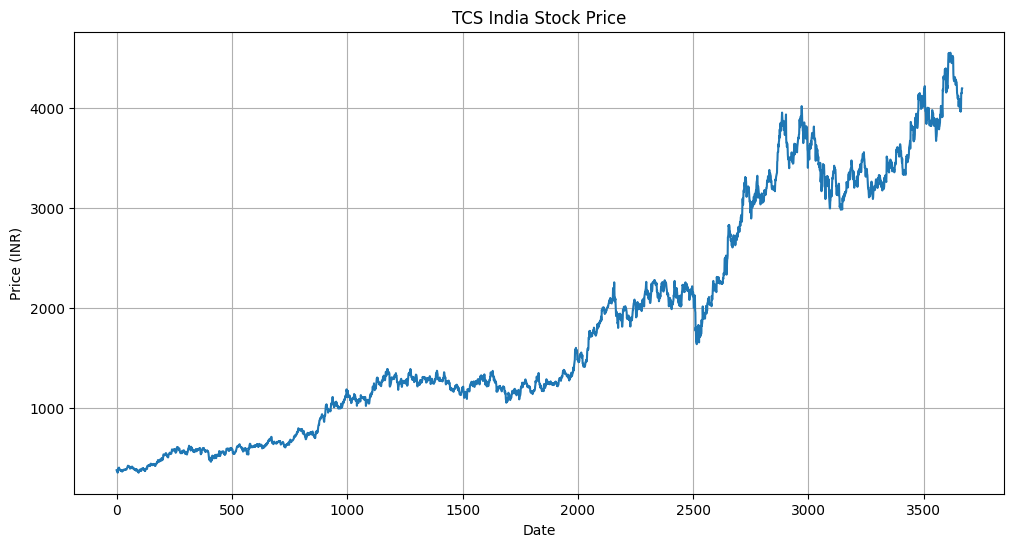

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178
...,...,...,...,...,...
3663,4139.649902,4149.799805,3975.250000,4003.600098,3792017
3664,4150.899902,4205.799805,4085.050049,4169.700195,3724349
3665,4147.000000,4169.750000,4117.649902,4155.000000,1648039


# Plotting moving averages of 100 day

---



In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3663,4215.103494
3664,4218.291992
3665,4221.610991
3666,4225.580994


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

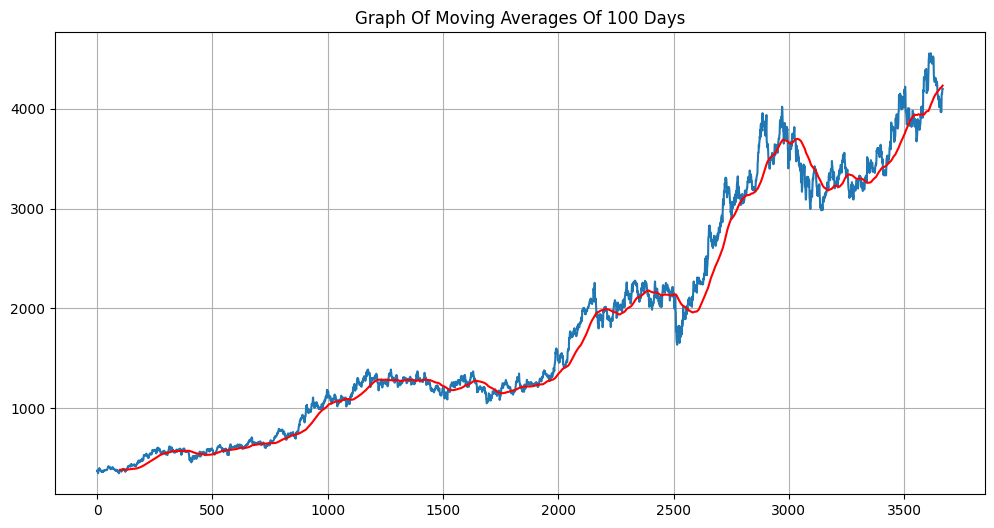

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3663,4079.037250
3664,4080.272749
3665,4081.701249
3666,4083.271749


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

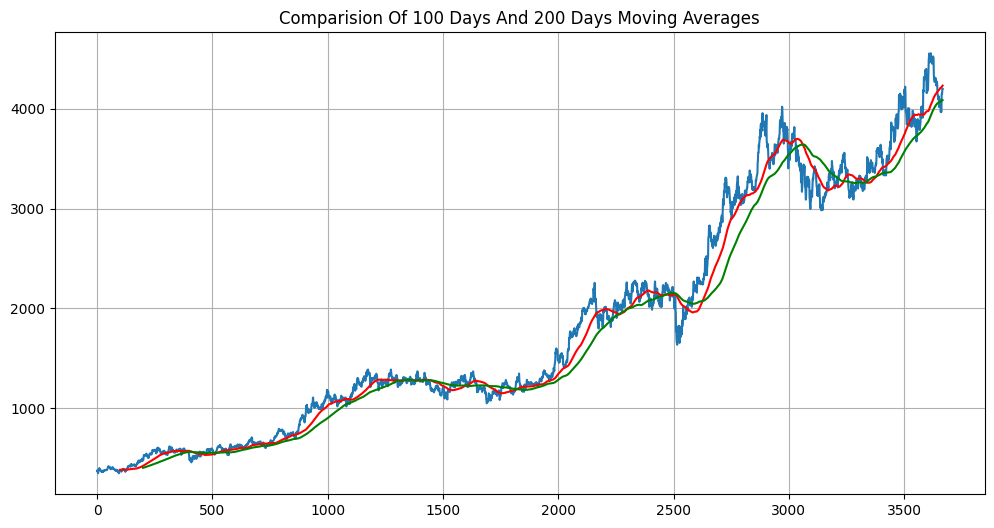

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

(3668, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2567, 7)
(1101, 7)


In [ ]:
train.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04 00:00:00+00:00,288.775726,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05 00:00:00+00:00,288.852448,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06 00:00:00+00:00,282.321259,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07 00:00:00+00:00,274.464600,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08 00:00:00+00:00,268.855408,349.899994,359.250000,348.250000,358.000000,6048178


In [ ]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2567,2020-06-08 00:00:00+00:00,1911.836548,2071.750000,2095.000000,2062.100098,2078.250000,2957841
2568,2020-06-09 00:00:00+00:00,1912.113770,2072.050049,2095.500000,2060.250000,2063.100098,2909439
2569,2020-06-10 00:00:00+00:00,1945.980835,2108.750000,2132.000000,2073.500000,2077.050049,5168397
2570,2020-06-11 00:00:00+00:00,1908.053345,2067.649902,2105.000000,2061.800049,2100.000000,2269513
2571,2020-06-12 00:00:00+00:00,1882.076050,2039.500000,2049.199951,2011.000000,2011.199951,2842642


# Using MinMax scaler for normalization of the dataset

---



In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import MinMaxScaler

# # Scaling the data
# scaler = MinMaxScaler(feature_range=(0, 1))
# train_close = train.iloc[:, 4:5].values
# test_close = test.iloc[:, 4:5].values

# data_training_array = scaler.fit_transform(train_close)

# # Apply PCA
# pca = PCA(n_components=0.95)  # Retain 95% variance
# data_training_pca = pca.fit_transform(data_training_array)

# # Preparing training data
# x_train = []
# y_train = []

# for i in range(100, data_training_pca.shape[0]):
#     x_train.append(data_training_pca[i-100:i])  # Use PCA-transformed data
#     y_train.append(data_training_array[i, 0])  # Target remains untransformed

# x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01671754],
       [0.01606246],
       [0.01251195],
       ...,
       [0.87904671],
       [0.89306534],
       [0.88968517]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2467, 100, 1)

# ML Model (LSTM)

---



In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Attention


In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

# Define a custom Attention layer
class Attention(tf.keras.layers.Layer):
    def __init__(self):
        super(Attention, self).__init__()
    def call(self, query, value):
        score = tf.matmul(query, value, transpose_b=True)  # Attention score
        weights = tf.nn.softmax(score, axis=-1)           # Normalized weights
        context = tf.matmul(weights, value)               # Context vector
        return context

# Define the input
inputs = Input(shape=(x_train.shape[1], 1))

# LSTM layers
lstm_1 = LSTM(units=50, activation='relu', return_sequences=True)(inputs)
dropout_1 = Dropout(0.1)(lstm_1)

lstm_2 = LSTM(units=60, activation='relu', return_sequences=True)(dropout_1)
dropout_2 = Dropout(0.1)(lstm_2)

lstm_3 = LSTM(units=80, activation='relu', return_sequences=True)(dropout_2)
dropout_3 = Dropout(0.1)(lstm_3)

lstm_4 = LSTM(units=120, activation='relu', return_sequences=True)(dropout_3)

# Attention layer
attention = Attention()(lstm_4, lstm_4)

# Flatten or Pool to reduce dimensionality
flatten = tf.keras.layers.GlobalAveragePooling1D()(attention)

# Dense output layer
outputs = Dense(units=1)(flatten)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Summary of the model
model.summary()


Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 100, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_20 (LSTM)            │ (None, 100, 50)        │         10,400 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_20 (Dropout)      │ (None, 100, 50)        │              0 │ lstm_20[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_21 (LSTM)            │ (None, 100, 60)        │         26,640 │ dropout_20[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_21 (Dropout)      │ (None, 100, 60)        │              0 │ lstm_21[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_22 (LSTM)            │ (None, 100, 80)        │         45,120 │ dropout_21[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_22 (Dropout)      │ (None, 100, 80)        │              0 │ lstm_22[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_23 (LSTM)            │ (None, 100, 120)       │         96,480 │ dropout_22[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_2 (Attention)   │ (None, 100, 120)       │              0 │ lstm_23[0][0],         │
│                           │                        │                │ lstm_23[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 120)            │              0 │ attention_2[0][0]      │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 1)              │            121 │ global_average_poolin… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.1))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.1))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.1))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.1))

# model.add(LSTM(units=100, activation='relu', return_sequences=True))
# model.add(Dropout(0.1))


# Add Attention layer
attention_output = Attention()(model.output, model.output)
# attention_output = Attention()([model.output, model.output])  # Self-attention on LSTM output
# model.add(Dense(units=1))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: The layer sequential_3 has never been called and thus has no defined output.

In [ ]:
model.summary()

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 100, 1)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_20 (LSTM)            │ (None, 100, 50)        │         10,400 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_20 (Dropout)      │ (None, 100, 50)        │              0 │ lstm_20[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_21 (LSTM)            │ (None, 100, 60)        │         26,640 │ dropout_20[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_21 (Dropout)      │ (None, 100, 60)        │              0 │ lstm_21[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_22 (LSTM)            │ (None, 100, 80)        │         45,120 │ dropout_21[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_22 (Dropout)      │ (None, 100, 80)        │              0 │ lstm_22[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_23 (LSTM)            │ (None, 100, 120)       │         96,480 │ dropout_22[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_2 (Attention)   │ (None, 100, 120)       │              0 │ lstm_23[0][0],         │
│                           │                        │                │ lstm_23[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 120)            │              0 │ attention_2[0][0]      │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 1)              │            121 │ global_average_poolin… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [ ]:
# from tensorflow.keras.optimizers import Adam
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [ ]:
# import tensorflow as tf
# model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - loss: 0.0805 - mean_absolute_error: 0.1966
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0035 - mean_absolute_error: 0.0421
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0035 - mean_absolute_error: 0.0412
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0033 - mean_absolute_error: 0.0414
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0034 - mean_absolute_error: 0.0419
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0055 - mean_absolute_error: 0.0543
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0033 - mean_absolute_error: 0.0421
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0037 - mean_absolute_error: 0.0436
Epoch 9/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0042 - mean_absolute_error: 0.0464
Epoch 10/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0032 - mean_absolute_error: 0.0403
Epoch 11/100
78/78 ━━━━━━━━

In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(1101, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [ ]:
# final_df = past_100_days.append(test_df, ignore_index = True)
final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [ ]:
final_df.head()

,0
0,2202.050049
1,2210.000000
2,2208.000000
3,2184.699951
4,2195.000000


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.23154078],
       [0.23418552],
       [0.23352017],
       ...,
       [0.86881016],
       [0.86881016],
       [0.88434608]])

In [ ]:
input_data.shape

(1201, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1101, 100, 1)
(1101,)


SELAM - Ensure that both the training and testing data are normalized before feeding them into the model:

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train.reshape(-1, 1)).reshape(x_train.shape)
# x_test = scaler.transform(x_test.reshape(-1, 1)).reshape(x_test.shape)


# Making prediction and plotting the graph of predicted vs actual values

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step


In [ ]:
# # Select the last prediction from each sequence
# y_pred_last = y_pred[:, -1, 0]  # Select the last element from the second dimension

# # Inverse transform the selected predictions
# y_pred_inverse = scaler.inverse_transform(y_pred_last.reshape(-1, 1))  # Reshape to 2D for inverse_transform

# # Scale the predictions back to original units
# scale_factor = 1 / scaler.scale_[0]  # Get the scale factor from scaler.scale_
# y_pred_scaled = y_pred_inverse * scale_factor
# y_test_scaled = y_test * scale_factor  # Scale y_test as well

# ... (Rest of the code for plotting and evaluation)

In [ ]:
y_pred.shape

(1101, 1)

In [ ]:
y_test

array([0.18498314, 0.18436766, 0.18877558, ..., 0.86881016, 0.86881016,
       0.88434608])

In [ ]:
y_pred

array([[0.18277296],
       [0.18169686],
       [0.18060233],
       ...,
       [0.8722049 ],
       [0.8718462 ],
       [0.8715236 ]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00033267])

In [ ]:
scale_factor = 1 / 0.00041967  # Replace with your scale factor
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()


In [ ]:
# scale_factor = 1/0.00041967
# y_pred = y_pred_inverse * scale_factor
# y_test = y_test * scale_factor

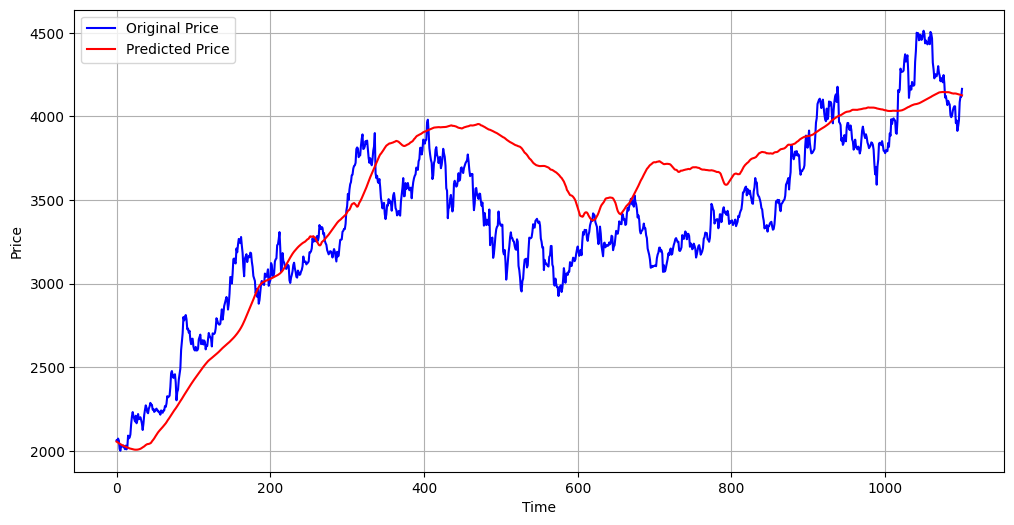

In [ ]:
# y_pred = np.squeeze(y_pred)
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = y_pred.flatten()
mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 7.66%


Calculation of R2 score

In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.6150137744167831


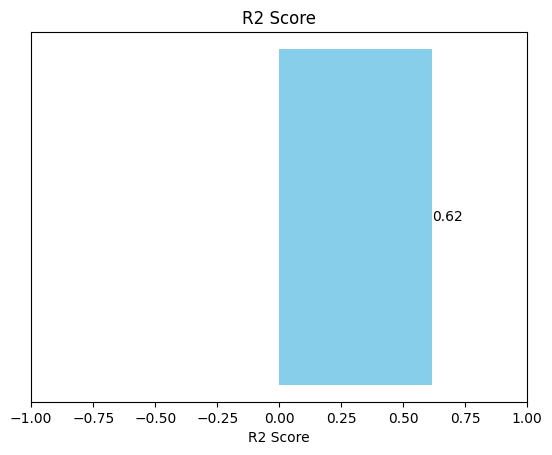

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

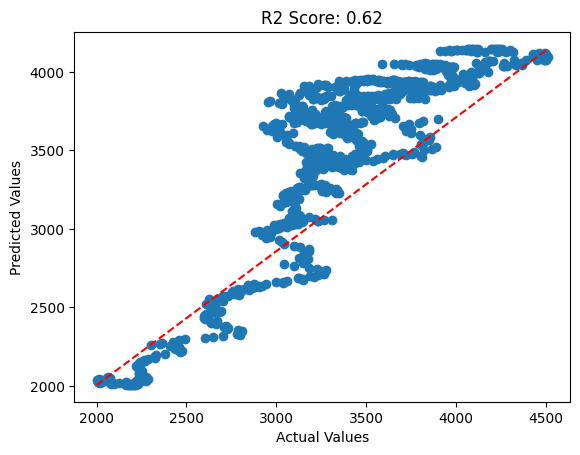

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()